<a href="https://www.kaggle.com/code/irynaps/weather-regression?scriptVersionId=186795999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

For this dataset I would like to practice **Linear Regression** and **Logistic Regression** as they are two basic machine learning algorithms. The notebook will serve as a didactic material for myself as for these two algorithms.     
The idea for **Linear Regression** is to predict temperature based on other metrics. Firstly, based on one independent variable and then with various independent variables, as well as to use matrics like R2, mean square error and mean absolute error.
The idea for **Logistic Regression** is to predict type of weather based on certain metrics provided. 

# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
from sklearn import preprocessing
import math

%matplotlib inline
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-data/Weather Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/weather-data/Weather Data.csv")
df

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa               Weather  
0               8.0     101.24                   Fog  
1               8.0     101.24                   Fog  
2               4.0     101.26  Freezing Drizzle,Fog  
3               4.0     101.27  Freezing Drizzle,Fog  
4               4.8     101.23                   Fog  
...             ...        ...                   ...  
8779            9.7     100.13                  Snow  
8780            9.7     100.03                  Snow  
8781            4.8      99.95                  Snow  
8782            9.7      99.91                  Snow  
8783           11.3      99.89                  Snow  

[8784 rows x 8 columns]

In [3]:
df.info()
# the dataset seems to be consistent and has no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
df.describe()
# in this way we can view some basic descriptive metrics for the dataset
# so we are able to grasp the idea of values range

Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000

In [5]:
df["Date/Time"].value_counts()
# seems like data in unique per each day

Date/Time
1/1/2012 0:00       1
9/1/2012 3:00       1
8/31/2012 21:00     1
8/31/2012 22:00     1
8/31/2012 23:00     1
                   ..
5/1/2012 17:00      1
5/1/2012 16:00      1
5/1/2012 15:00      1
5/1/2012 14:00      1
12/31/2012 23:00    1
Name: count, Length: 8784, dtype: int64

In [6]:
# let's separate month and hour as they might be used for the algorithms 
df["DateTime"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M")

df["Month"] = df["DateTime"].dt.month
df["Hour"] = df["DateTime"].dt.hour

df = df.drop("DateTime", axis=1)
df

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa               Weather  Month  Hour  
0               8.0     101.24                   Fog      1     0  
1               8.0     101.24                   Fog      1     1  
2               4.0     101.26  Freezing Drizzle,Fog      1     2  
3               4.0     101.27  Freezing Drizzle,Fog      1     3  
4               4.8     101.23                   Fog      1     4  
...             ...        ...                   ...    ...   ...  
8779            9.7     100.13                  Snow     12    19  
8780            9.7     100.03                  Snow     12    20  
8781            4.8      99.95                  Snow     12    21  
8782            9.7      99.91                  Snow     12    22  
8783           11.3      99.89                  Snow     12    23  

[8784 rows x 10 columns]

In [7]:
# there's an option to encode weather column, so it would provide more data
# let's check the cases when there are two or more values in weather
df["Weather"].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [8]:
# the cases when weather column includes two or more are not a usual prectice for this dataset
# let's consider including solely the first value as in other cases the date can prove to be valuable
df["Weather"] = df["Weather"].str.split(",").str[0]
df["Weather"].value_counts()

Weather
Mainly Clear        2106
Mostly Cloudy       2069
Cloudy              1728
Clear               1326
Snow                 457
Rain                 450
Rain Showers         191
Fog                  150
Drizzle              139
Snow Showers          64
Freezing Drizzle      27
Thunderstorms         27
Freezing Rain         22
Haze                  16
Moderate Snow          6
Freezing Fog           4
Snow Pellets           1
Moderate Rain          1
Name: count, dtype: int64

In [9]:
# let's not consider the cases with lass than 10 entries as it makes the dara highly disequilibrated
to_drop = ["Moderate Rain", "Snow Pellets", "Freezing Fog", "Moderate Snow"]
df = df[~df["Weather"].isin(to_drop)]

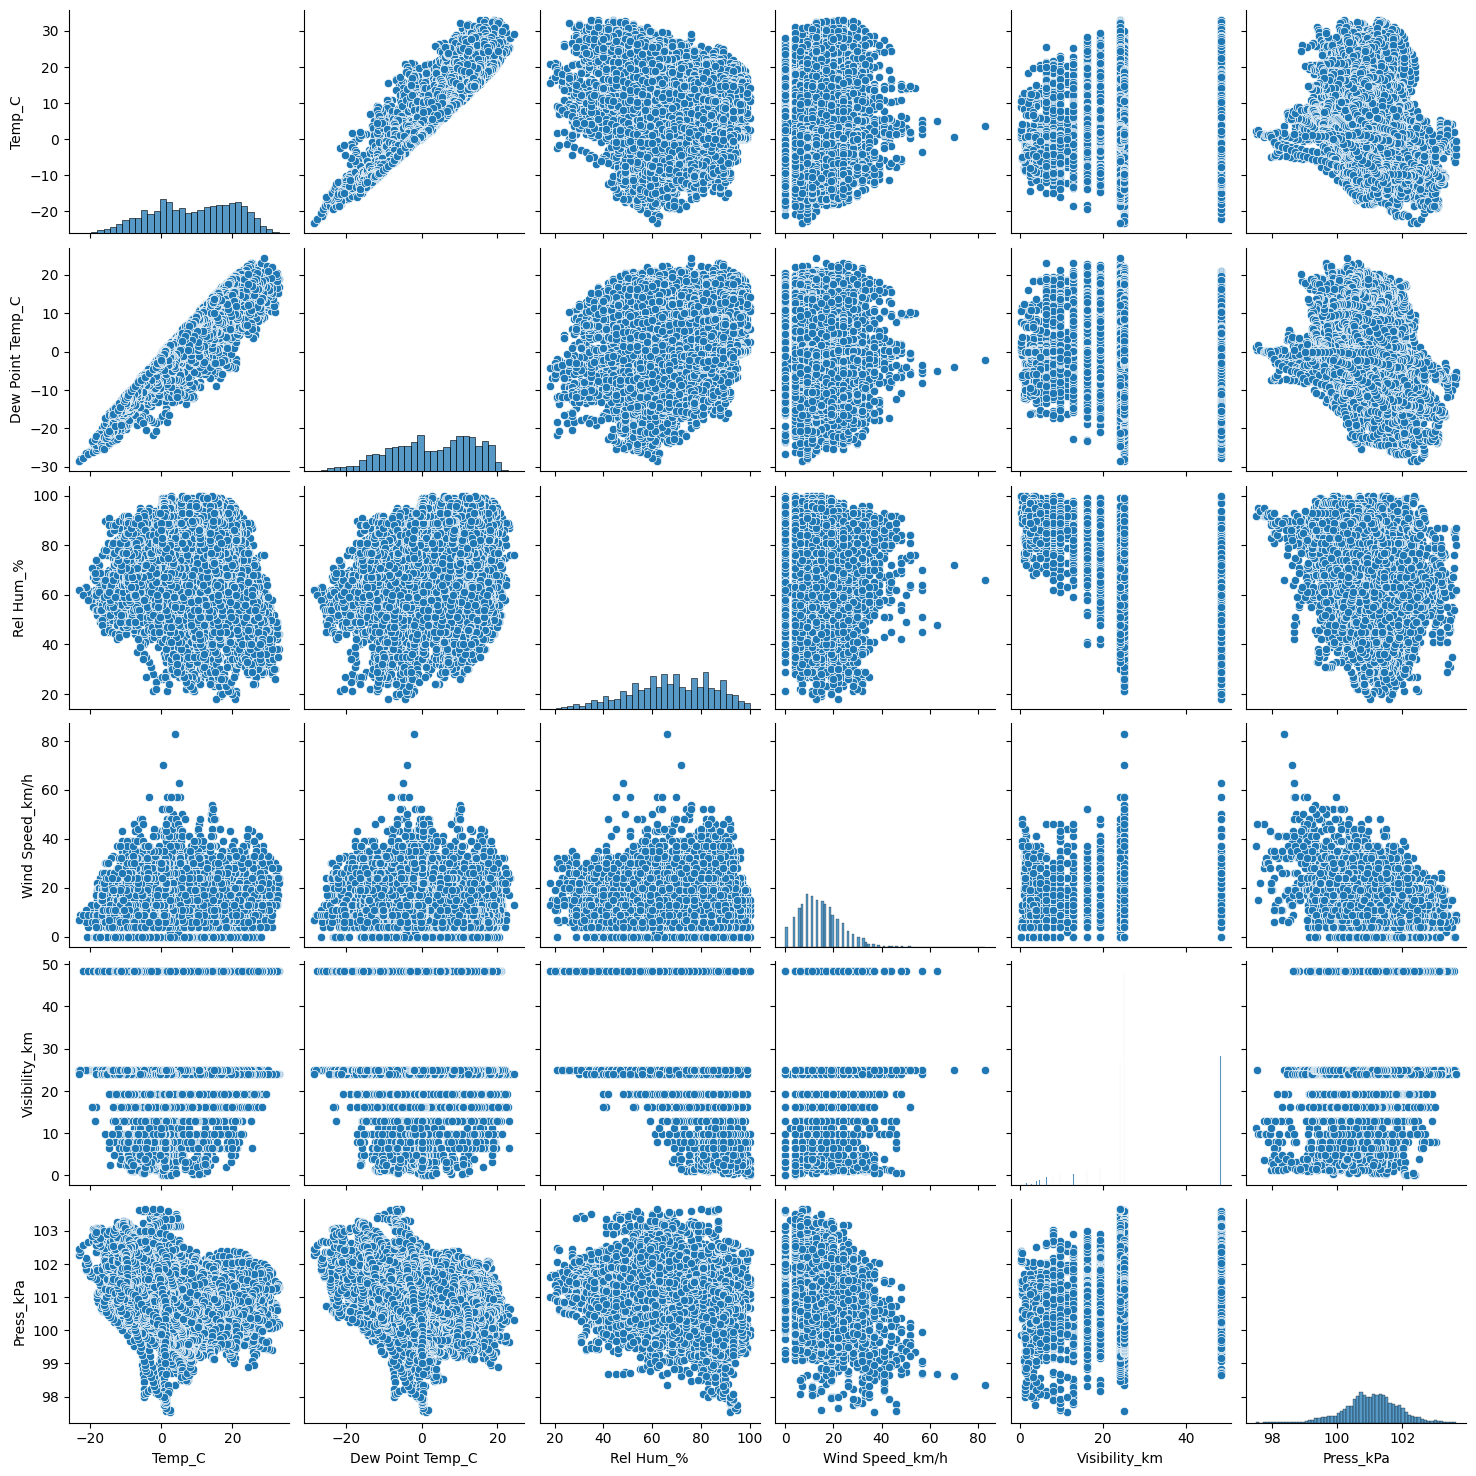

In [10]:
# let's view what kind of relations the variables have
sns.pairplot(df[["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]])
plt.show()

In [11]:
df[["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]].corr()

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932674  -0.218974        -0.060562   
Dew Point Temp_C  0.932674          1.000000   0.140842        -0.094843   
Rel Hum_%        -0.218974          0.140842   1.000000        -0.094526   
Wind Speed_km/h  -0.060562         -0.094843  -0.094526         1.000000   
Visibility_km     0.271144          0.048438  -0.633077         0.007868   
Press_kPa        -0.236753         -0.321026  -0.231922        -0.355526   

                  Visibility_km  Press_kPa  
Temp_C                 0.271144  -0.236753  
Dew Point Temp_C       0.048438  -0.321026  
Rel Hum_%             -0.633077  -0.231922  
Wind Speed_km/h        0.007868  -0.355526  
Visibility_km          1.000000   0.232474  
Press_kPa              0.232474   1.000000

Correlation helps greatly to analyse the dependancy between variables. As, for example, between Temp_C and Dew Point Temp_C or Visibility_km and Rel_Hum_%. In other cases there seems to be correlation that is not that strong.

# Linear Regression

Let's try firstly simple linear regression with one independent value and one dependent.    
Formula:   
**Temperature = B0 + B1 * Dew Point Temp_C**

In [12]:
# defining X and y based on the columns that will be used
X = df["Dew Point Temp_C"].values
y = df["Temp_C"].values

# reshaping X with numpy
X = np.reshape(np.asarray(X), (len(X),1))

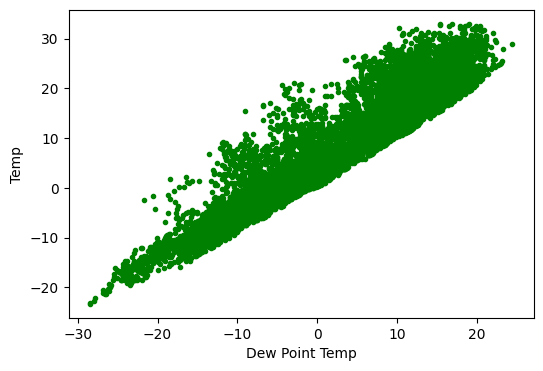

In [13]:
# viewing the distribution of variables
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, y, color="green", marker=".")
ax.set_xlabel("Dew Point Temp")
ax.set_ylabel("Temp")
plt.show()

In [14]:
# defining train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# creating the model and training it
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

The **coefficient of determination** or **R2** is a measure that provides about goodness of fit of the model. In this context it measures how well the regression line approximates to the actual data.   
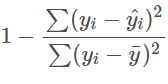    
In numerator we have **sum squared regression**, it is the sum of residuals (difference between predicted value and real value) squared.   
In denominator we have **total sum of squares** is the sum of the distance the data is away from the mean all squared. It measures how widely the dataset is spread from the mean.    
As it is percentage it will take values between 0 and 1.


In [16]:
r2 = reg.score(X_test, y_test)
print(f"R2: {r2:.2f}")
# here we observe pretty high value of R2 as for having only two variables

R2: 0.86


**Mean Squared Error** assesses the average squared error difference between the observed and predicted values.    
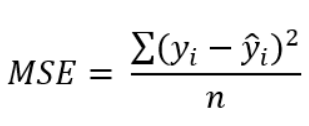     
*yi* is the ith observed value
*ŷi* is the corresponding predicted value
*n* = the number of observations
Why do we square the differences?    
* it eliminates negative values and ensures that the result is always greater than 0   
* it increases impact of larger errors, it penalizes more than smaller ones, so it makes it essential as for model to have smaller errors
      
          
      
**Mean Absolute Error** represents the average of all absolute errors in the set of measurements.    
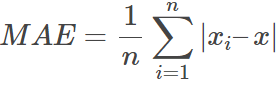

In [17]:
y_predict = reg.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 18.63
MAE: 3.36


In [18]:
# let's display bias and the coefficient to visualize formula
b0 = reg.intercept_
b1 = reg.coef_[0]

print (f"Temp_C = {b0:.2f} + {b1:.2f} · Dew Point Temp_C")

Temp_C = 6.21 + 1.00 · Dew Point Temp_C


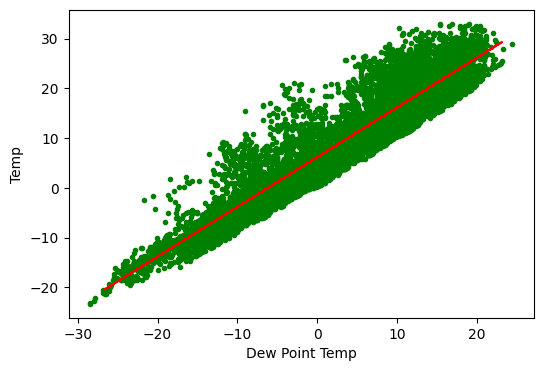

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, y, color="green", marker=".")
ax.plot(X_test, y_predict, color="red")
ax.set_xlabel("Dew Point Temp")
ax.set_ylabel("Temp")
plt.show()

# Multiple Linear Regression

Let's define the formula for **Multiple Linear Regression** and what data will be used.    
Temperature will be y, the continous value to predict.   
X will be Dew Point Temp, Rel Hum, Wind Speed, Visibility and Press.   
Linear Regression formula will be like this:    
Temprature = B0 + B1 * Dew Point Temp_C + B2 * Rel_Hum_% + B3 * Wind_Speed_km/h + B4 * Visibility_km + B5 * Press_kPa

In [20]:
# defining X and y and using .values to convert it into numpy matrix

X = df[["Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]].values
y = df["Temp_C"].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print(X_train.shape)
print(X_test.shape)

(7017, 5)
(1755, 5)


In [23]:
reg_mul = linear_model.LinearRegression()
reg_mul.fit(X_train, y_train)

LinearRegression()

In [24]:
r2 = reg_mul.score(X_test, y_test)
print(f"R2: {r2:.3f}")

R2: 0.996


In [25]:
y_predict = reg_mul.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 0.62
MAE: 0.60


Having 0.99 as R-squared is an incredibly high value to consider. It means that with provided 5 metrics it's possible to predict the temperature almost without error. Let's also visualize the formula with bias and coefficients for each variable.

In [26]:
b0 = reg_mul.intercept_
betas = reg_mul.coef_

print(f"Temp_C = {b0:.2f} + {betas[0]:.2f} · Dew Point Temp_C + {betas[1]:.2f} · Rel_Hum_% + {betas[2]:.2f} · Wind_Speed_km/h + {betas[3]:.2f} · Visibility_km + {betas[4]:.2f} · Press_kPa")

Temp_C = 32.03 + 1.05 · Dew Point Temp_C + -0.25 · Rel_Hum_% + -0.01 · Wind_Speed_km/h + -0.00 · Visibility_km + -0.09 · Press_kPa


# Logistic Regression

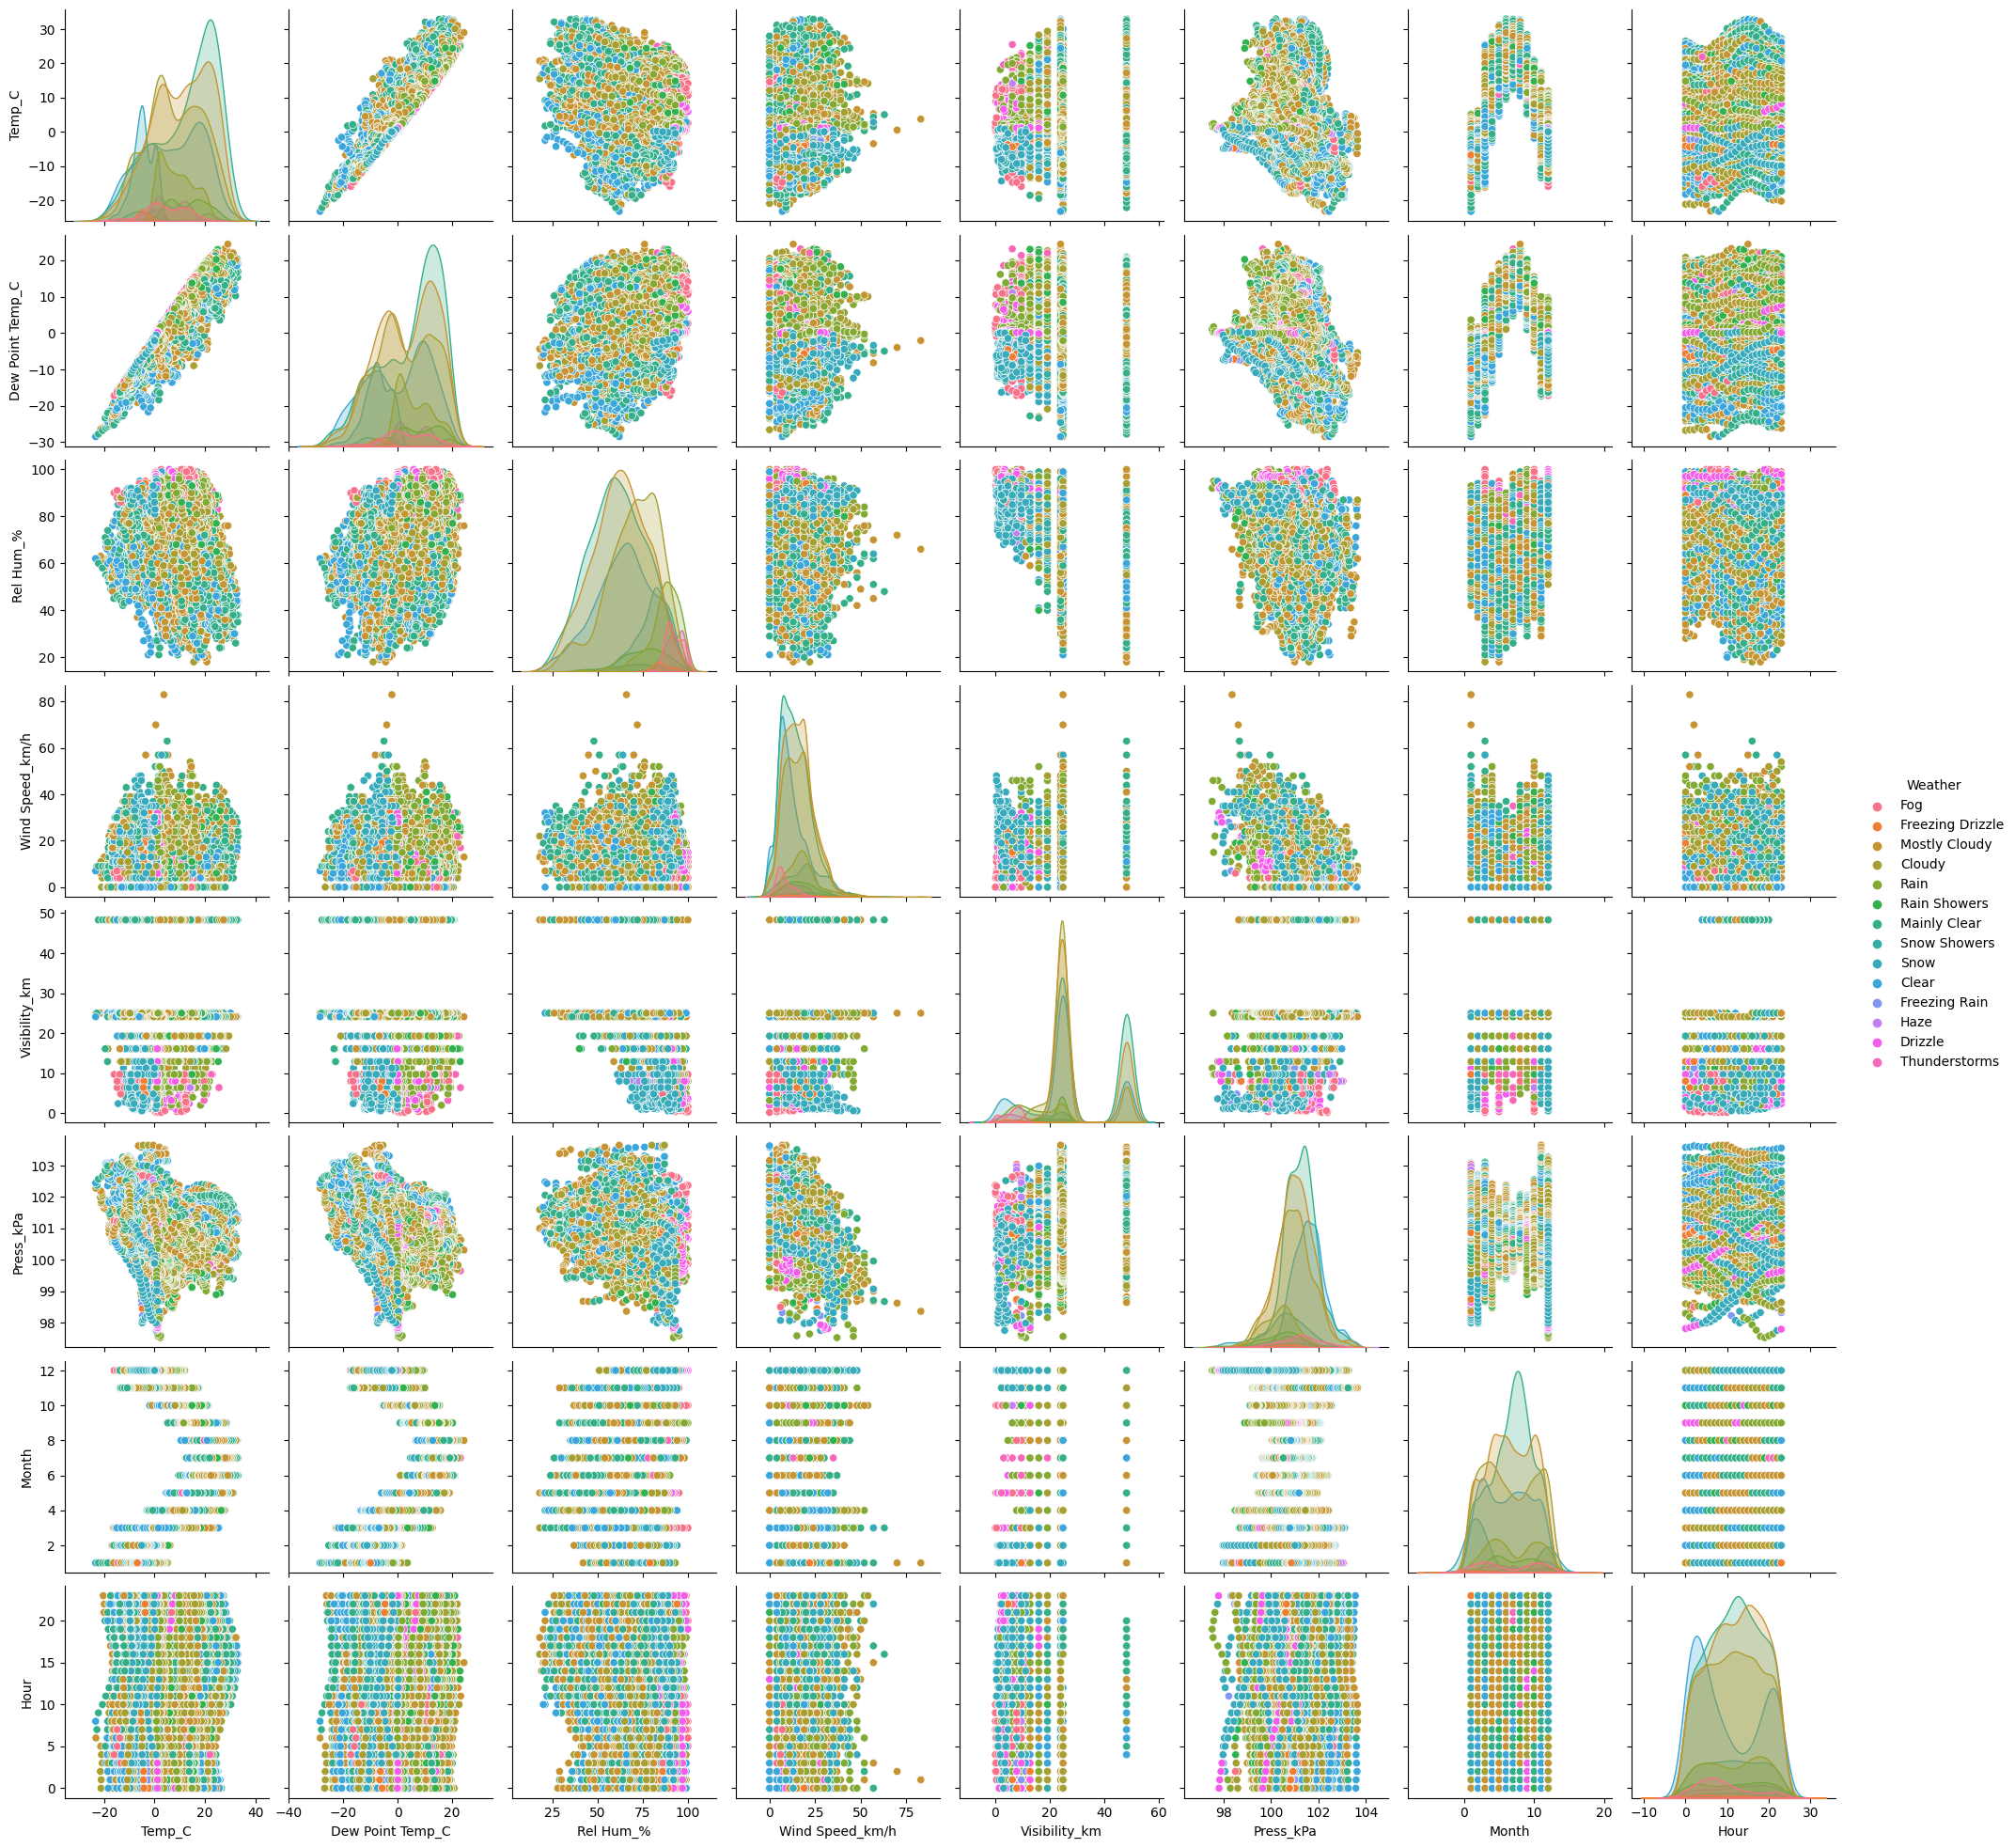

In [27]:
# let's view how different types of weather manifest themselves throughout the data
sns.pairplot(df, hue="Weather", palette="husl")
plt.show()

In [28]:
# let's drop the cases that have less than 100 data entries as it causes data to be highly disequilibrated
to_drop = ["Snow Showers", "Freezing Drizzle", "Thunderstorms", "Freezing Rain", "Haze", "Moderate Snow", "Freezing Fog", "Snow Pellets", "Moderate Rain"]
df = df[~df["Weather"].isin(to_drop)]

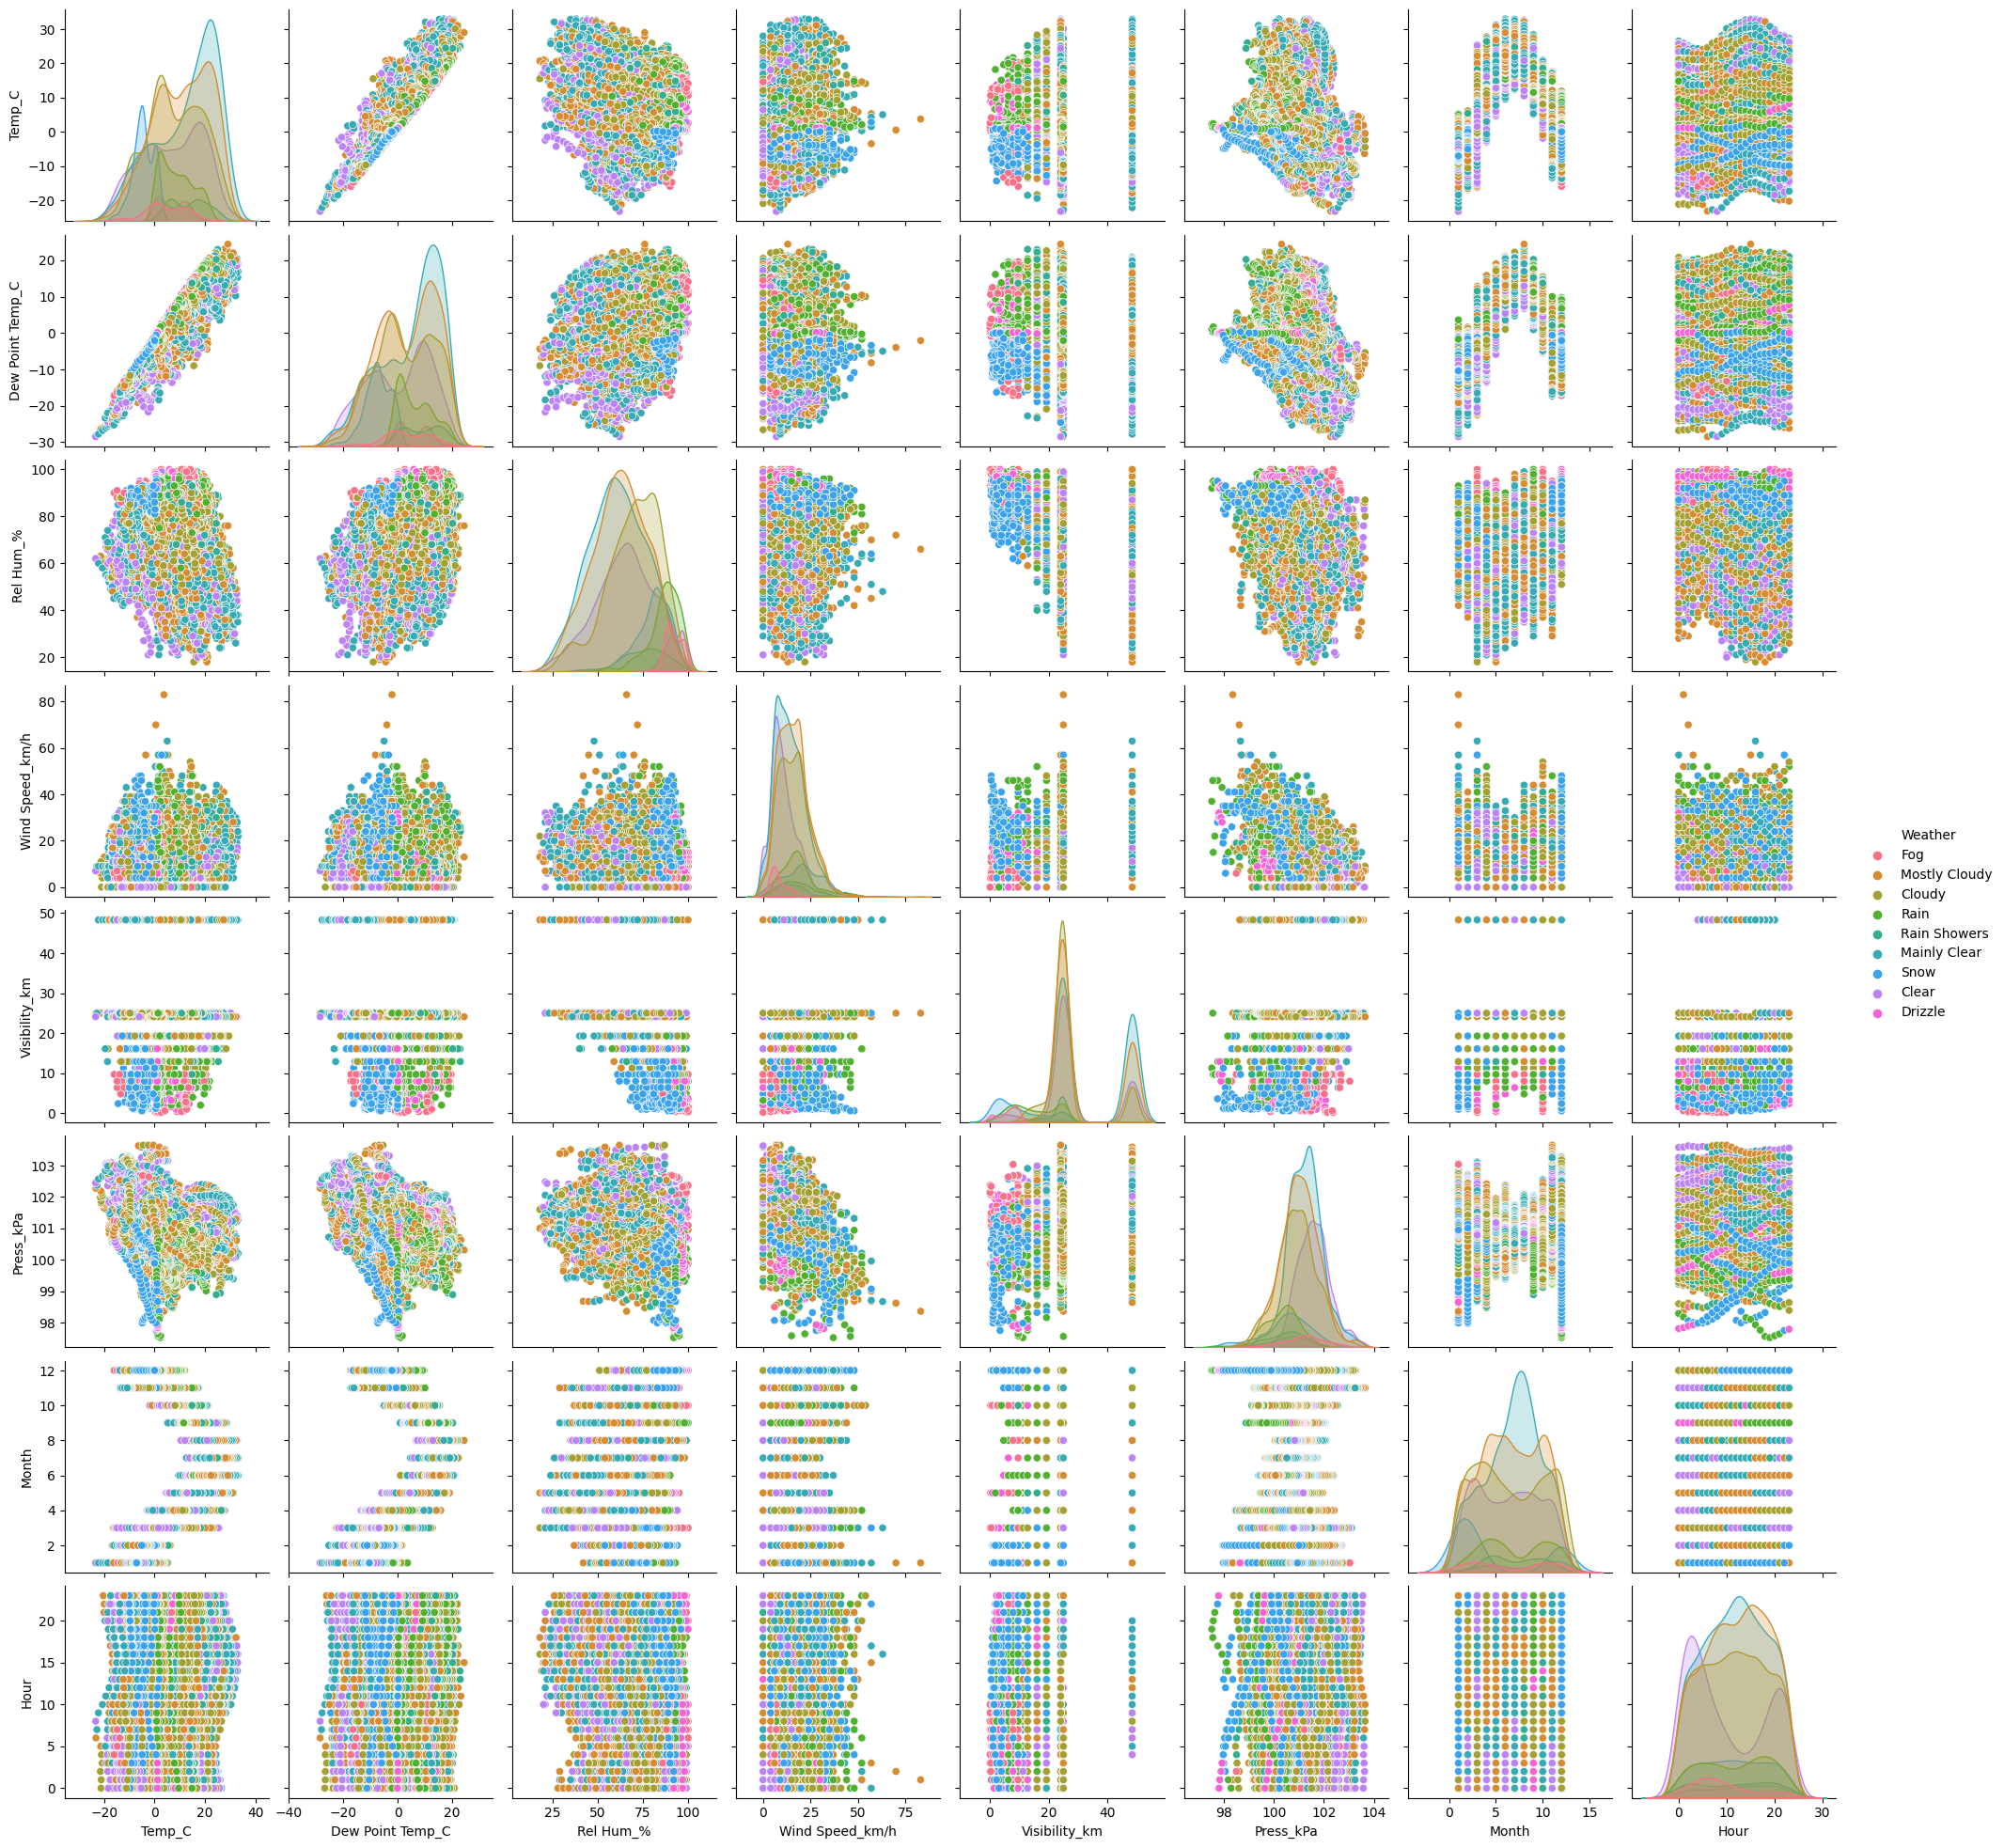

In [29]:
sns.pairplot(df, hue="Weather", palette="husl")
plt.show()

In [30]:
# let's firstly define the X and y
X = df[["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]].values
y_labels = df["Weather"].values

In [31]:
print(y_labels)
# as we might observe, we have categorical values as for y
# and they are not fit for the model

['Fog' 'Fog' 'Fog' ... 'Snow' 'Snow' 'Snow']


In [32]:
# we will use LabelEncoder to encode the values of y
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)
print(y)

[3 3 3 ... 8 8 8]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
lr = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [35]:
# let's display what hides under the hood for this model

X_weather = X_test[42]
y_weather = y_test[42]
y_weather_real = le.inverse_transform([y_weather])

print(f"Real value for weather -> {y_weather_real}")

prediction = lr.predict([X_weather])
y_weather_prediction = le.inverse_transform([prediction])

print(f"Prediction for weather -> {prediction}")
print(f"Value for weather prediction -> {y_weather_prediction}")

Real value for weather -> ['Snow']
Prediction for weather -> [1]
Value for weather prediction -> ['Cloudy']


In [36]:
# let's view the classes order to diaplay decision function
class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(class_mapping)

{'Clear': 0, 'Cloudy': 1, 'Drizzle': 2, 'Fog': 3, 'Mainly Clear': 4, 'Mostly Cloudy': 5, 'Rain': 6, 'Rain Showers': 7, 'Snow': 8}


In [37]:
fun_d = lr.decision_function([X_weather])

print("Decision function:" + \
     f"\nClear: {fun_d[0,0]:.2f}\nCloudy: {fun_d[0,1]:.2f}\nDrizzle: {fun_d[0,2]:.2f}" + \
     f"\nFog: {fun_d[0,3]:.2f}\nMainly Clear: {fun_d[0,4]:.2f}\nMostly Cloudy: {fun_d[0,5]:.2f}" + \
     f"\nRain: {fun_d[0,6]:.2}\nRain Showers: {fun_d[0,7]:.2f}\nSnow: {fun_d[0,8]:.2f}")

Decision function:
Clear: -2.36
Cloudy: -1.19
Drizzle: -6.45
Fog: -9.19
Mainly Clear: -1.84
Mostly Cloudy: -1.50
Rain: -3.6
Rain Showers: -4.10
Snow: -4.46


In [38]:
# let's show how these values have been obtained for this particular case

b0 = lr.intercept_
b = lr.coef_

clear = b0[0] + (b[0,0] * X_weather[0]) + (b[0,1] * X_weather[1]) + (b[0,2] * X_weather[2]) + (b[0,3] * X_weather[3]) + (b[0,4] * X_weather[4]) + (b[0,5] * X_weather[5])
cloudy = b0[1] + (b[1,0] * X_weather[0]) + (b[1,1] * X_weather[1]) + (b[1,2] * X_weather[2]) + (b[1,3] * X_weather[3]) + (b[1,4] * X_weather[4]) + (b[1,5] * X_weather[5])
drizzle = b0[2] + (b[2,0] * X_weather[0]) + (b[2,1] * X_weather[1]) + (b[2,2] * X_weather[2]) + (b[2,3] * X_weather[3]) + (b[2,4] * X_weather[4]) + (b[2,5] * X_weather[5])
fog = b0[3] + (b[3,0] * X_weather[0]) + (b[3,1] * X_weather[1]) + (b[3,2] * X_weather[2]) + (b[3,3] * X_weather[3]) + (b[3,4] * X_weather[4]) + (b[3,5] * X_weather[5])
mainly_clear = b0[4] + (b[4,0] * X_weather[0]) + (b[4,1] * X_weather[1]) + (b[4,2] * X_weather[2]) + (b[4,3] * X_weather[3]) + (b[4,4] * X_weather[4]) + (b[4,5] * X_weather[5])
mostly_cloudy = b0[5] + (b[5,0] * X_weather[0]) + (b[5,1] * X_weather[1]) + (b[5,2] * X_weather[2]) + (b[5,3] * X_weather[3]) + (b[5,4] * X_weather[4]) + (b[5,5] * X_weather[5])
rain = b0[6] + (b[6,0] * X_weather[0]) + (b[6,1] * X_weather[1]) + (b[6,2] * X_weather[2]) + (b[6,3] * X_weather[3]) + (b[6,4] * X_weather[4]) + (b[6,5] * X_weather[5])
rain_showers = b0[7] + (b[7,0] * X_weather[0]) + (b[7,1] * X_weather[1]) + (b[7,2] * X_weather[2]) + (b[7,3] * X_weather[3]) + (b[7,4] * X_weather[4]) + (b[7,5] * X_weather[5])
snow = b0[8] + (b[8,0] * X_weather[0]) + (b[8,1] * X_weather[1]) + (b[8,2] * X_weather[2]) + (b[8,3] * X_weather[3]) + (b[8,4] * X_weather[4]) + (b[8,5] * X_weather[5])


print("Decision function:" + \
     f"\nClear: {clear:.2f}\nCloudy: {cloudy:.2f}\nDrizzle: {drizzle:.2f}" + \
     f"\nFog: {fog:.2f}\nMainly Clear: {mainly_clear:.2f}\nMostly Cloudy: {mostly_cloudy:.2f}" + \
     f"\nRain: {rain:.2f}\nRain Showers: {rain_showers:.2f}\nSnow: {snow:.2f}")

Decision function:
Clear: -2.36
Cloudy: -1.19
Drizzle: -6.45
Fog: -9.19
Mainly Clear: -1.84
Mostly Cloudy: -1.50
Rain: -3.60
Rain Showers: -4.10
Snow: -4.46


In [39]:
# let's now calculate probabilities of belonging into each class
p_clear = 1 / (1 + math.exp(-1 * (clear)))
p_cloudy = 1 / (1 + math.exp(-1 * (cloudy)))
p_drizzle = 1 / (1 + math.exp(-1 * (drizzle)))
p_fog = 1 / (1 + math.exp(-1 * (fog)))
p_mainly_clear = 1 / (1 + math.exp(-1 * (mainly_clear)))
p_mostly_cloudy = 1 / (1 + math.exp(-1 * (mostly_cloudy)))
p_rain = 1 / (1 + math.exp(-1 * (rain)))
p_rain_showers = 1 / (1 + math.exp(-1 * (rain_showers)))
p_snow = 1 / (1 + math.exp(-1 * (snow)))

print("Probabilities of belongigng into each class:" + \
     f"\nClear: {p_clear:.2f}\nCloudy: {p_cloudy:.2f}\nDrizzle: {p_drizzle:.2f}" + \
     f"\nFog: {p_fog:.2f}\nMainly Clear: {p_mainly_clear:.2f}\nMostly Cloudy: {p_mostly_cloudy:.2f}" + \
     f"\nRain: {p_rain:.2f}\nRain Showers: {p_rain_showers:.2f}\nSnow: {p_snow:.2f}")

Probabilities of belongigng into each class:
Clear: 0.09
Cloudy: 0.23
Drizzle: 0.00
Fog: 0.00
Mainly Clear: 0.14
Mostly Cloudy: 0.18
Rain: 0.03
Rain Showers: 0.02
Snow: 0.01


**Metrics for Logistic Regression (and Classification models):**
* **Accuracy** is the proprtion of correctly classified instances out of all instances.       
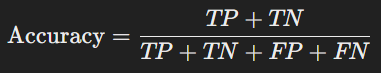    
* **Precision** is the proportion of true positive instances out of all instances classified as positive.     
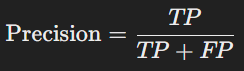     
* **Recall** is the proportion of true positive instances out of all actual positive instances.      
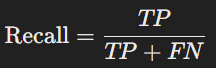      
* **F1 Score** is the harmonic mean of precision and recall, useful for imbalanced datasets.      
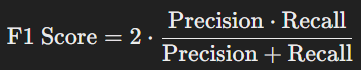      
* **Specificity** is the proportion of true negative instances out of all actual negative instances.   
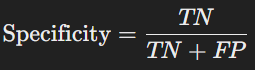       
* **ROC-AUC Score** is the area under the Receiver Operating Characteristic curve, which plots the true positive rate against the false positive rate at various threshold settings.
* **Log Loss (Cross-Entropy Loss)** measures the performance of a classification model where the prediction output is a probability value between 0 and 1.      
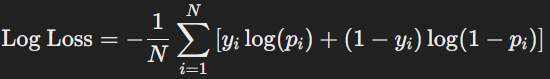   

**Factors to consider when choosing the metrics:**   
* problem type
* class imbalance
* cost of FP and FN
* particular problem

In [40]:
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)

In [41]:
# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
log_loss_value = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"Roc-Auc: {roc_auc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

Accuracy: 0.35
Precision: 0.31
Recall: 0.34
F1: 0.32
Roc-Auc: 0.82
Log Loss: 1.47


In [42]:
# as we might observe by accuracy and this comparison 
# LogisticRegression hasn't been very successful in this particular case
comparison_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
comparison_df["correct"] = comparison_df["y_test"] == comparison_df["y_pred"]
comparison_df["correct"].value_counts()

correct
False    1112
True      612
Name: count, dtype: int64